#**2.	Prédiction du prix des logements**
**Description** : Construire un modèle de régression pour prédire les prix des logements en fonction de diverses caractéristiques.


**Dataset** : Boston Housing Dataset (https://www.kaggle.com/c/boston-housing)

##**plan** :

1. Charger et explorer les données.

2. Nettoyer et préparer les données pour l'entraînement.

3. Entraîner différents modèles de régression.

4. Comparer les performances des modèles et choisir le meilleur.

5. Optimiser le modèle sélectionné et évaluer ses performances.




#**1. Charger et explorer les données.**

In [ ]:
# Importer les bibliothèques nécessaires à ce projet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)

%matplotlib inline

In [ ]:
train_data = pd.read_csv('/content/train.csv')

# Aperçu des données
print("Train Data Head:")
print(train_data.head())


Train Data Head:
   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     18.7  394.63   2.94  33.4  
3     18.7  396.90   5.33  36.2  
4     15.2  395.60  12.43  22.9  


In [ ]:
# Statistiques descriptives
print("Description du dataset d'entraînement :")
print(train_data.describe())

# Vérification des valeurs nulles
print("Valeurs nulles dans le dataset d'entraînement :")
print(train_data.isnull().any())

# Vérification des zéros
print("\nZéros dans le dataset d'entraînement :")
print((train_data == 0).sum())




Description du dataset d'entraînement :
               ID        crim          zn       indus        chas         nox  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean   250.951952    3.360341   10.689189   11.293483    0.060060    0.557144   
std    147.859438    7.352272   22.674762    6.998123    0.237956    0.114955   
min      1.000000    0.006320    0.000000    0.740000    0.000000    0.385000   
25%    123.000000    0.078960    0.000000    5.130000    0.000000    0.453000   
50%    244.000000    0.261690    0.000000    9.900000    0.000000    0.538000   
75%    377.000000    3.678220   12.500000   18.100000    0.000000    0.631000   
max    506.000000   73.534100  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean     6.265619   68.226426    3.709934    9.633634  409.279279   

In [ ]:
print("dimensions du jeu de données d'entraînement :", train_data.shape)


dimensions du jeu de données d'entraînement : (333, 15)


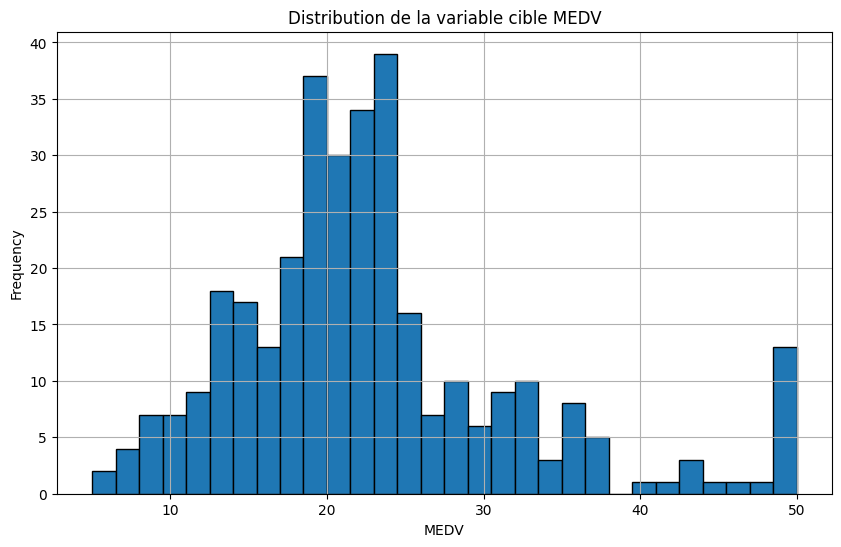

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(train_data['medv'], bins=30, edgecolor='black')
plt.title('Distribution de la variable cible MEDV')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


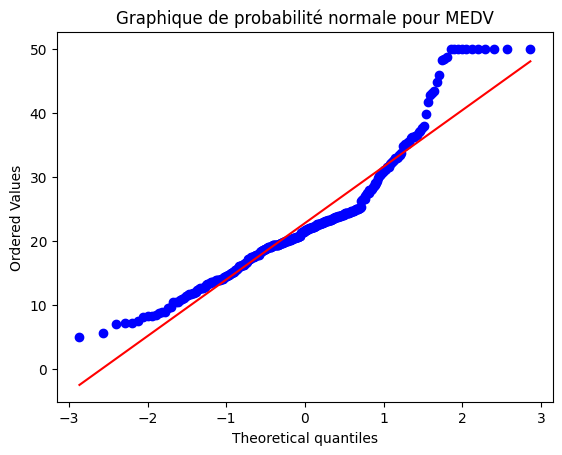

In [ ]:
import scipy.stats as stats

stats.probplot(train_data['medv'], dist="norm", plot=plt)
plt.title('Graphique de probabilité normale pour MEDV')
plt.show()


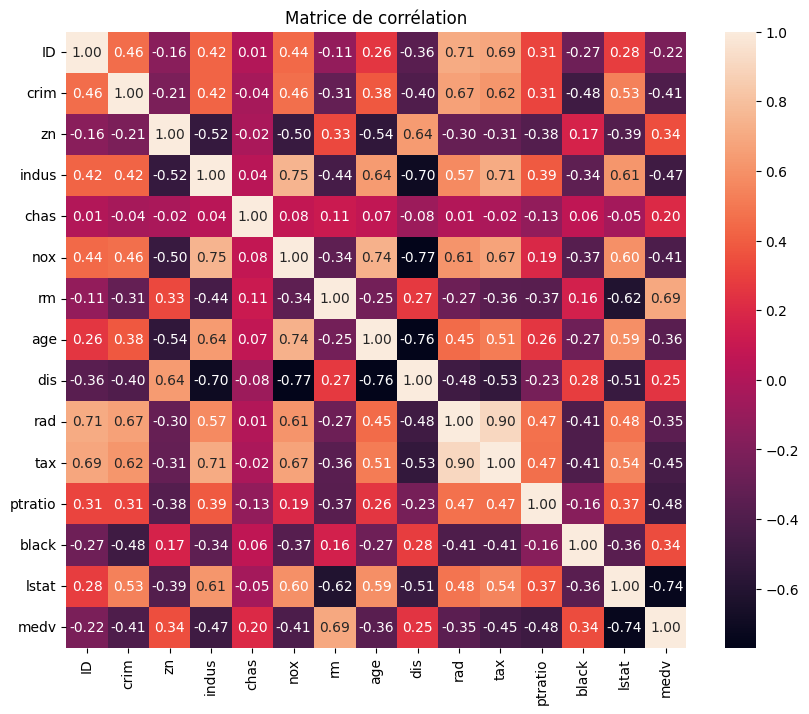

In [ ]:
# Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

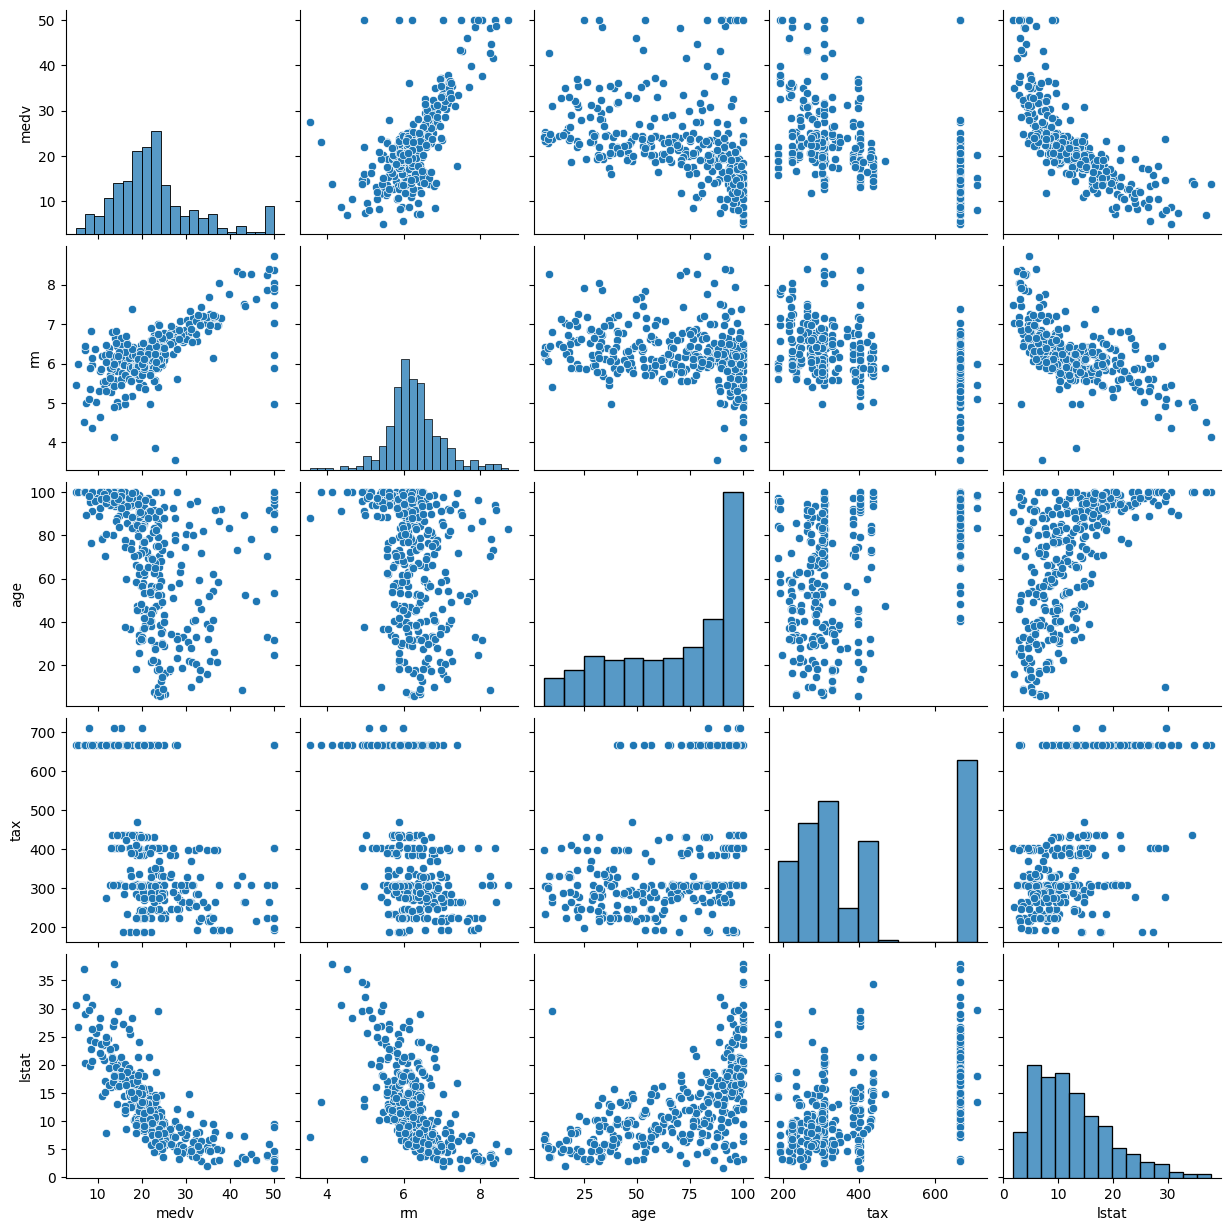

In [ ]:

sns.pairplot(train_data[['medv', 'rm', 'age', 'tax', 'lstat']])
plt.show()


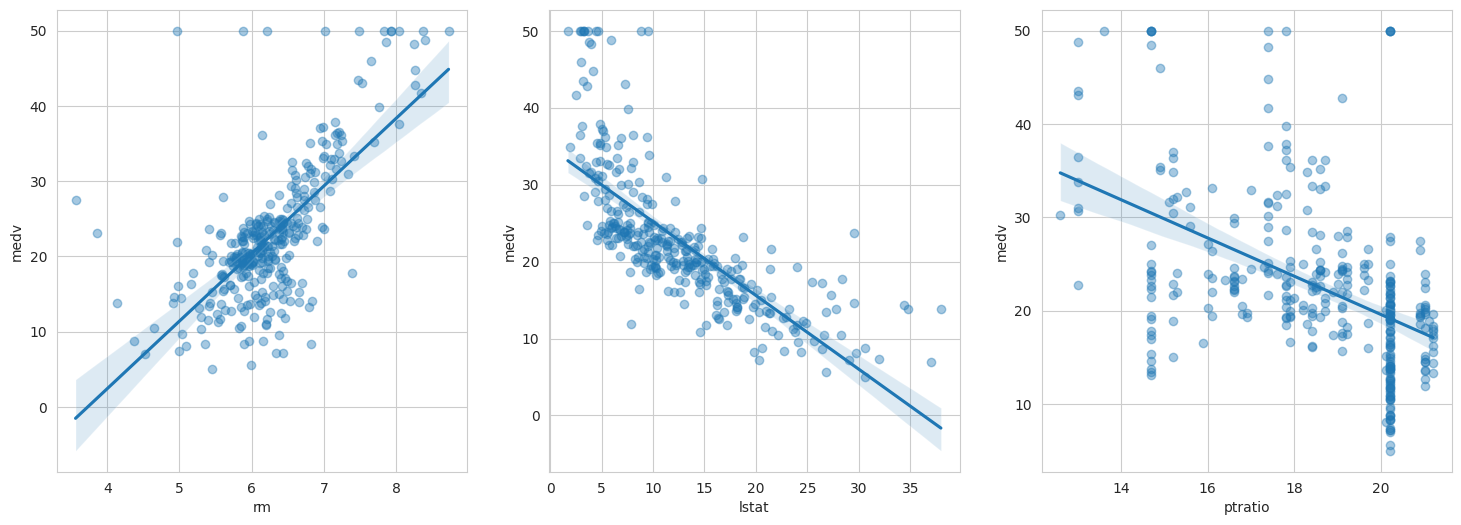

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

#Tracer la relation entre 'RM' et 'MEDV'
sns.regplot(x='rm', y='medv', data=train_data, ax=ax[0], scatter_kws={'alpha': 0.4})

# Tracer la relation entre 'LSTAT' et 'MEDV'
sns.regplot(x='lstat', y='medv', data=train_data, ax=ax[1], scatter_kws={'alpha': 0.4})

# Tracer la relation entre 'PTRATIO' et 'MEDV'
sns.regplot(x='ptratio', y='medv', data=train_data, ax=ax[2], scatter_kws={'alpha': 0.4})

plt.show()

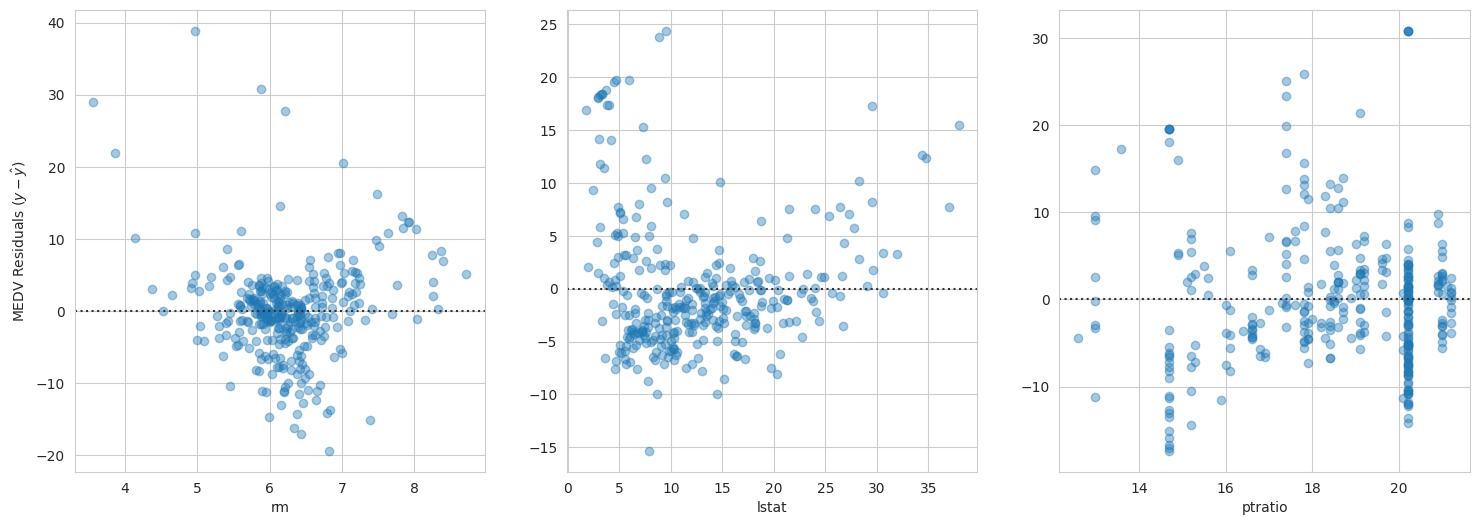

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Graphique des résidus pour 'RM' vs. 'MEDV'
ax[0] = sns.residplot(x='rm', y='medv', data=train_data, ax=ax[0], scatter_kws={'alpha': 0.4})
ax[0].set_ylabel('MEDV Residuals $(y-\hat{y})$')

# Graphique des résidus pour 'LSTAT' vs. 'MEDV'
ax[1] = sns.residplot(x='lstat', y='medv', data=train_data, ax=ax[1], scatter_kws={'alpha': 0.4})
ax[1].set_ylabel('')

# Graphique des résidus pour 'PTRATIO' vs. 'MEDV'
ax[2] = sns.residplot(x='ptratio', y='medv', data=train_data, ax=ax[2], scatter_kws={'alpha': 0.4})
ax[2].set_ylabel('')

plt.show()

In [ ]:
for column in train_data.columns:
    # Calculate Q1
    q1 = train_data[column].quantile(0.25)
    # Calculate Q3
    q3 = train_data[column].quantile(0.75)
    # Interquartile range (IQR)
    iqr = q3 - q1

    # Déterminer les valeurs aberrantes en utilisant l'IQR

    outliers = train_data[column][((train_data[column] <= (q1 - 1.5 * iqr)) | (train_data[column] >= (q3 + 1.5 * iqr)))]
    # Pourcentage de valeurs aberrantes dans la colonne
    perc = len(outliers) * 100.0 / len(train_data)


    print("Column {} outliers = {:.2f}%".format(column, perc))

Column ID outliers = 0.00%
Column crim outliers = 12.61%
Column zn outliers = 12.31%
Column indus outliers = 0.00%
Column chas outliers = 100.00%
Column nox outliers = 0.00%
Column rm outliers = 6.31%
Column age outliers = 0.00%
Column dis outliers = 0.30%
Column rad outliers = 0.00%
Column tax outliers = 0.00%
Column ptratio outliers = 2.70%
Column black outliers = 14.11%
Column lstat outliers = 2.10%
Column medv outliers = 8.41%


In [ ]:
# Remove outliers where MEDV is 50.0 or greater
filtered_data = train_data[train_data['medv'] < 50.0]

# Print the shape of the DataFrame after removing the outliers
print("Shape of the DataFrame after removing outliers:", np.shape(filtered_data))

Shape of the DataFrame after removing outliers: (322, 15)


#Feature Selection
Les hypothèses suivantes peuvent être formulées :

1. Les maisons avec plus de pièces (valeur ‘RM’ plus élevée) vaudront plus, donc une augmentation de la valeur de RM augmente la valeur de MEDV, c'est-à-dire le prix de la maison. Ce sont des variables directement proportionnelles.
2. Les maisons dans les quartiers avec plus de résidents de statut inférieur (valeur ‘LSTAT’ plus élevée) vaudront moins, donc plus la valeur de LSTAT est basse, plus la valeur de MEDV est élevée. Ce sont des variables inversement proportionnelles.
3. Les maisons dans les quartiers avec un ratio élèves/enseignant plus élevé (valeur ‘PTRATIO’ plus élevée) vaudront moins, donc une diminution de la valeur de PTRATIO augmente la valeur de MEDV. Ce sont des variables inversement proportionnelles.


Comme notre objectif est de développer un modèle capable de prédire la valeur des maisons, nous allons diviser le jeu de données en caractéristiques pertinentes ('RM', 'LSTAT' et 'PTRATIO') et en variable cible 'MEDV', et les stocker respectivement dans les variables features et prices.


Toutes les autres caractéristiques non pertinentes seront exclues.

In [ ]:
prices = train_data['medv']

# Drop specified columns from the DataFrame
reduced_data = train_data.drop(['crim', 'zn', 'indus', 'chas', 'nox', 'age', 'dis', 'rad', 'tax', 'black'], axis=1)

# Separate the features from the target variable 'MEDV'
features = reduced_data.drop('medv', axis=1)

# Display the first few rows of the updated DataFrame
print(reduced_data.head())

   ID     rm  ptratio  lstat  medv
0   1  6.575     15.3   4.98  24.0
1   2  6.421     17.8   9.14  21.6
2   4  6.998     18.7   2.94  33.4
3   5  7.147     18.7   5.33  36.2
4   7  6.012     15.2  12.43  22.9


In [ ]:
# Assuming 'features' and 'prices' have already been defined as mentioned earlier
X = features
y = prices

# Printing the shapes of X and y to ensure they are correctly aligned
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)


Shape of X (features): (333, 4)
Shape of y (target): (333,)


In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the features and transform them
scaled_X = scaler.fit_transform(X)

# Check the mean and standard deviation of the scaled features
print("Mean of scaled features:", scaled_X.mean(axis=0))  # Close to 0
print("Standard deviation of scaled features:", scaled_X.std(axis=0))  # Close to 1

Mean of scaled features: [ 8.53504788e-17  1.92038577e-16  1.92038577e-16 -2.34713817e-16]
Standard deviation of scaled features: [1. 1. 1. 1.]


In [ ]:
# Split and shuffle the data
seed = 9
test_size = 0.20

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size, random_state = seed)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(266, 4)
(67, 4)
(266,)
(67,)


In [ ]:
models = {}
models["Linear"] = LinearRegression()
models["Lasso"] = Lasso()
models["Ridge"] = Ridge()
models["ElasticNet"] = ElasticNet()
models["KNN"] = KNeighborsRegressor()
models["DecisionTree"] = DecisionTreeRegressor()
models["SVR"] = SVR(gamma='scale')
models["AdaBoost"] = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"] = RandomForestRegressor()
models["ExtraTrees"]= ExtraTreesRegressor()

In [ ]:
model_results = []
folds = 10
metric = 'neg_mean_squared_error'
model_names   = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=None)
    results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)

    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

Linear: -34.168, 12.499
Lasso: -35.56, 14.019
Ridge: -34.162, 12.525
ElasticNet: -38.12, 16.56
KNN: -21.341, 9.184
DecisionTree: -37.868, 19.248
SVR: -32.768, 17.575
AdaBoost: -17.486, 8.528
GradientBoost: -15.85, 6.501
RandomForest: -19.188, 7.345
ExtraTrees: -15.773, 5.455


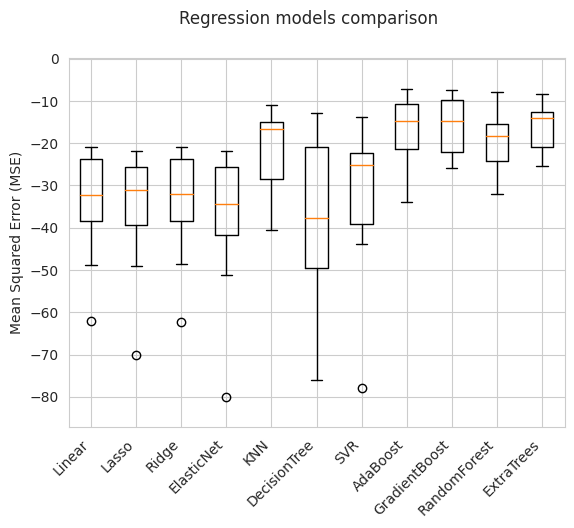

In [ ]:
# Compare algorithms
figure = plt.figure()
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)

In [ ]:
# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Initialize the ExtraTreesRegressor
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=42)

In [ ]:
# Predictions and evaluation for RandomForest
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print("RandomForest MSE:", rf_mse)

# Predictions and evaluation for ExtraTrees
et_predictions = et_model.predict(X_test)
et_mse = mean_squared_error(y_test, et_predictions)
print("ExtraTrees MSE:", et_mse)

RandomForest MSE: 13.306228611940298
ExtraTrees MSE: 6.370025447761212


In [ ]:
gbr = GradientBoostingRegressor(random_state=seed)

# Train the model using the training sets
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=9)

In [ ]:
# Make predictions using the model
predictions = gbr.predict(X_test)


# The mean squared error
print("MSE : {}".format(round(mean_squared_error(y_test, predictions), 3)))
# Explained variance score: 1 is perfect prediction, 0 is random
print('Variance score: {}'.format(round(r2_score(y_test, predictions), 2)))

MSE : 12.176
Variance score: 0.8


In [ ]:
from sklearn.model_selection import GridSearchCV

# Example of tuning RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters for RandomForest:", grid_search.best_params_)


Best parameters for RandomForest: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}


In [ ]:
# Initialize the RandomForestRegressor
rf_model1 = RandomForestRegressor(n_estimators=300, random_state=42,max_features='sqrt',max_depth=10)
rf_model1.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=300,
                      random_state=42)

In [ ]:
# Predictions and evaluation for RandomForest
rf_predictions1 = rf_model1.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions1)
print("RandomForest MSE:", rf_mse)

RandomForest MSE: 7.216417779752768
